In [1]:
# Import required libraries #
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from google.colab import files
uploaded = files.upload()

df = pd.read_csv("Student_performance_data _.csv")

print(df.head())

df = df.drop(columns=["GradeClass"], errors='ignore')
df = df.dropna()

features = [
    "StudyTimeWeekly", "Absences", "Tutoring", "ParentalSupport",
    "Extracurricular", "Sports", "Music", "Volunteering",
    "ParentalEducation", "Gender", "Ethnicity", "Age"
]

X = df[features]
y = df["GPA"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Linear regression model #
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)



Saving Student_performance_data _.csv to Student_performance_data _.csv
   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA 

In [2]:
# Calculate performance metrics #
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Model performance:")
print(f"RMSE: {rmse:.3f}")
print(f"R² Score: {r2 * 100:.1f}%")


Model performance:
RMSE: 0.197
R² Score: 95.3%


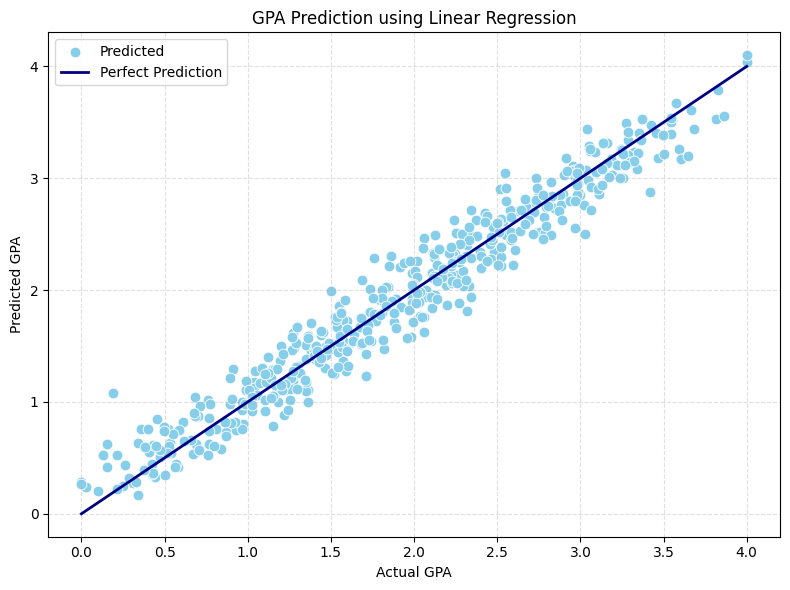

In [3]:

# Plot actual vs predicted GPA #
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color="skyblue", s=60, label="Predicted")


plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color="navy", linewidth=2, label="Perfect Prediction")

plt.xlabel("Actual GPA")
plt.ylabel("Predicted GPA")
plt.title("GPA Prediction using Linear Regression")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


In [5]:
# Bonus Polynomial regression #
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), LinearRegression())
poly_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_poly = poly_model.predict(X_test)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial RMSE: {rmse_poly:.3f}")
print(f"Polynomial R² Score: {r2_poly * 100:.2f}%")

# Feature Combination 1: Only academic-related features #
features_1 = ["StudyTimeWeekly", "Absences", "Tutoring", "ParentalEducation"]
X_subset_1 = X[features_1]
X_train_subset_1, X_test_subset_1, y_train_subset_1, y_test_subset_1 = train_test_split(
    X_subset_1, y, test_size=0.2, random_state=42
)
model_1 = LinearRegression()
model_1.fit(X_train_subset_1, y_train_subset_1)
y_pred_subset_1 = model_1.predict(X_test_subset_1)
rmse_subset_1 = np.sqrt(mean_squared_error(y_test_subset_1, y_pred_subset_1))
r2_subset_1 = r2_score(y_test_subset_1, y_pred_subset_1)

# Feature Combination 2: Only non-academic features #
features_2 = ["Extracurricular", "Sports", "Music", "Volunteering"]
X_subset_2 = X[features_2]
X_train_subset_2, X_test_subset_2, y_train_subset_2, y_test_subset_2 = train_test_split(
    X_subset_2, y, test_size=0.2, random_state=42
)
model_2 = LinearRegression()
model_2.fit(X_train_subset_2, y_train_subset_2)
y_pred_subset_2 = model_2.predict(X_test_subset_2)
rmse_subset_2 = np.sqrt(mean_squared_error(y_test_subset_2, y_pred_subset_2))
r2_subset_2 = r2_score(y_test_subset_2, y_pred_subset_2)

# Feature Combination 3: Without ParentalSupport #
features_3 = [
    "StudyTimeWeekly", "Absences", "Tutoring", "Extracurricular", "Sports",
    "Music", "Volunteering", "ParentalEducation", "Gender", "Ethnicity", "Age"
]
X_subset_3 = X[features_3]
X_train_subset_3, X_test_subset_3, y_train_subset_3, y_test_subset_3 = train_test_split(
    X_subset_3, y, test_size=0.2, random_state=42
)
model_3 = LinearRegression()
model_3.fit(X_train_subset_3, y_train_subset_3)
y_pred_subset_3 = model_3.predict(X_test_subset_3)
rmse_subset_3 = np.sqrt(mean_squared_error(y_test_subset_3, y_pred_subset_3))
r2_subset_3 = r2_score(y_test_subset_3, y_pred_subset_3)


Polynomial RMSE: 0.200
Polynomial R² Score: 95.16%


In [6]:

# Summary of the results #
data = {
    "Model": [
        "Linear Regression (All Features)", "Polynomial Regression (degree=2)",
        "Feature Combination 1", "Feature Combination 2", "Feature Combination 3"
    ],
    "RMSE": [
        rmse, rmse_poly, rmse_subset_1, rmse_subset_2, rmse_subset_3
    ],
    "R-squared": [
        r2 * 100, r2_poly * 100, r2_subset_1 * 100, r2_subset_2 * 100, r2_subset_3 * 100
    ]
}

performance_df = pd.DataFrame(data)
print(performance_df)

                              Model      RMSE  R-squared
0  Linear Regression (All Features)  0.196625  95.324717
1  Polynomial Regression (degree=2)  0.200085  95.158712
2             Feature Combination 1  0.309008  88.452991
3             Feature Combination 2  0.910315  -0.210610
4             Feature Combination 3  0.271775  91.068022
